Selected GNT file: /Users/erniesg/code/erniesg/if-letters-home-could-sing/data/Gnt1.1TrainPart1/1053-f.gnt
Total samples in this file: 3903

Sample of character image details:
Character: 横, Width: 80, Height: 78, Size: 6250 bytes
Character: 脓, Width: 81, Height: 55, Size: 4465 bytes
Character: 枚, Width: 65, Height: 86, Size: 5600 bytes
Character: ⑩, Width: 57, Height: 55, Size: 3145 bytes
Character: 娥, Width: 84, Height: 79, Size: 6646 bytes

Character with the most occurrences: '! ' (1 times)
Character with the least occurrences: '研' (1 times)


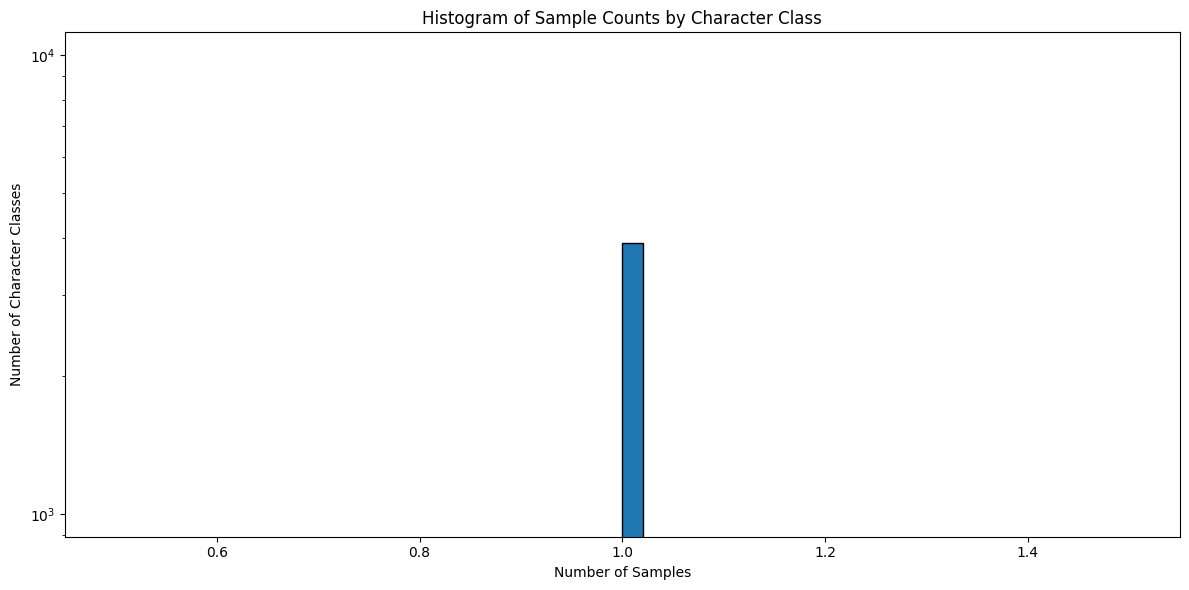

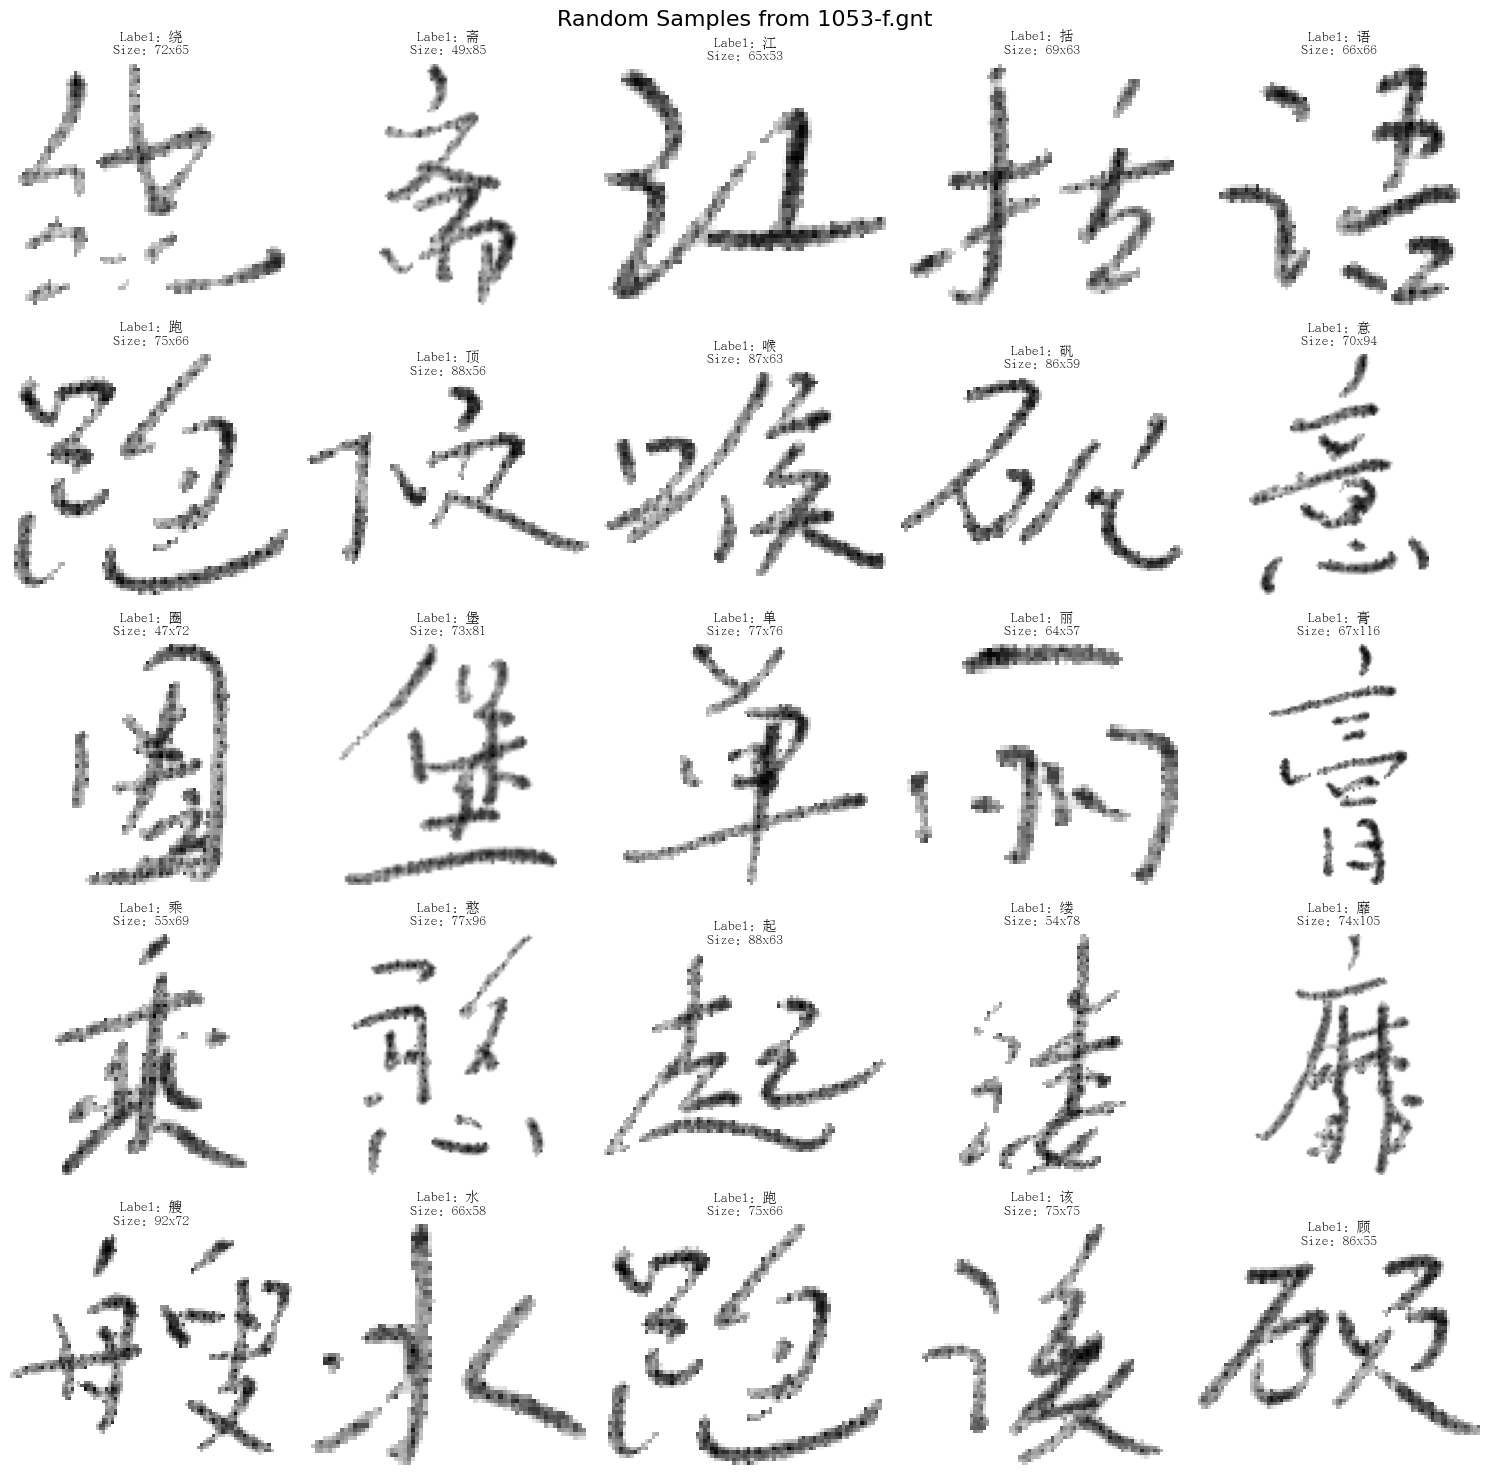

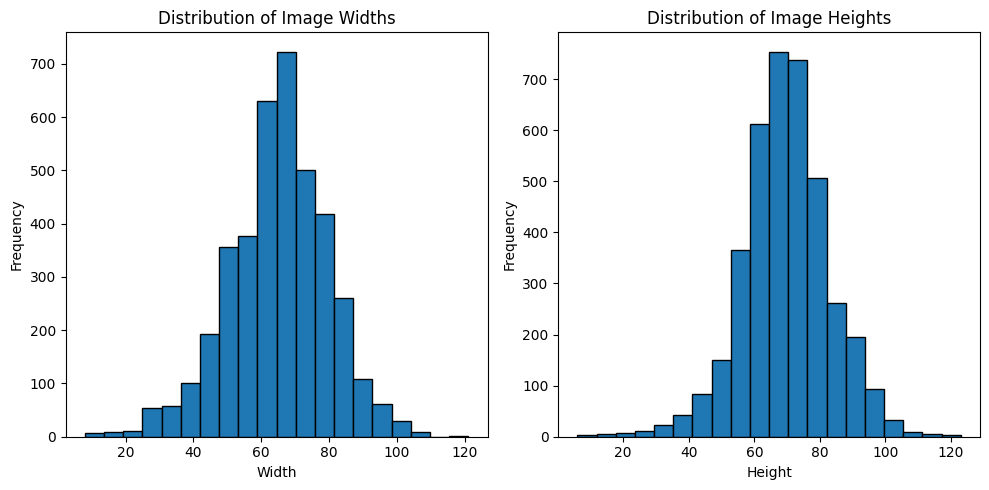

In [12]:
import os
import random
import struct
from codecs import decode
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from collections import Counter

# Set the base path to your dataset
BASE_PATH = "/Users/erniesg/code/erniesg/if-letters-home-could-sing/data"
FONT_PATH = "/Users/erniesg/code/erniesg/if-letters-home-could-sing/data/fonts/BabelStoneHan.ttf"

def load_gnt_file(filename):
    """
    Load characters and images from a given GNT file.
    """
    samples = []
    with open(filename, "rb") as f:
        while True:
            packed_length = f.read(4)
            if packed_length == b'':
                break

            length = struct.unpack("<I", packed_length)[0]
            raw_label = f.read(2)
            width = struct.unpack("<H", f.read(2))[0]
            height = struct.unpack("<H", f.read(2))[0]
            photo_bytes = f.read(height * width)

            try:
                label = raw_label.decode('gbk')
            except UnicodeDecodeError:
                try:
                    label = raw_label.decode('gb18030')
                except UnicodeDecodeError:
                    label = "?"
                    print(f"Warning: Unable to decode character in file {filename}")

            image = np.frombuffer(photo_bytes, dtype=np.uint8).reshape(height, width)

            samples.append((image, label, width, height, length))
    
    return samples

# Get all GNT directories
gnt_dirs = [
    "Gnt1.0TrainPart1", "Gnt1.0TrainPart2", "Gnt1.0TrainPart3",
    "Gnt1.1Test", "Gnt1.1TrainPart1", "Gnt1.1TrainPart2",
    "Gnt1.2Test", "Gnt1.2TrainPart1", "Gnt1.2TrainPart2"
]

# Select a random GNT directory
random_dir = random.choice(gnt_dirs)
dir_path = os.path.join(BASE_PATH, random_dir)

# Get all GNT files in the selected directory
gnt_files = [f for f in os.listdir(dir_path) if f.endswith('.gnt')]

# Select a random GNT file
random_gnt = random.choice(gnt_files)
random_gnt_path = os.path.join(dir_path, random_gnt)
print(f"Selected GNT file: {random_gnt_path}")

# Load samples from the selected GNT file
samples = load_gnt_file(random_gnt_path)
print(f"Total samples in this file: {len(samples)}")

# Print file type, height, width, and size of each character image
print("\nSample of character image details:")
for i, (image, label, width, height, length) in enumerate(random.sample(samples, min(5, len(samples)))):
    print(f"Character: {label}, Width: {width}, Height: {height}, Size: {length} bytes")

# Count occurrences of each character
char_counts = Counter(sample[1] for sample in samples)

# Find characters with greatest and least occurrences
most_common = char_counts.most_common(1)[0]
least_common = char_counts.most_common()[-1]

print(f"\nCharacter with the most occurrences: '{most_common[0]}' ({most_common[1]} times)")
print(f"Character with the least occurrences: '{least_common[0]}' ({least_common[1]} times)")

# Create a histogram of sample counts by character class
plt.figure(figsize=(12, 6))
counts = list(char_counts.values())
plt.hist(counts, bins=50, edgecolor='black')
plt.title("Histogram of Sample Counts by Character Class")
plt.xlabel("Number of Samples")
plt.ylabel("Number of Character Classes")
plt.yscale('log')  # Use log scale for y-axis due to potential large differences
plt.tight_layout()
plt.show()

# Set up the font for Chinese character display
font_prop = FontProperties(fname=FONT_PATH)

# Display a grid of random samples
num_samples = min(25, len(samples))
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle(f"Random Samples from {random_gnt}", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_samples:
        image, label, width, height, _ = random.choice(samples)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Label: {label}\nSize: {width}x{height}", fontproperties=font_prop)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Display statistics about image sizes
widths = [sample[2] for sample in samples]
heights = [sample[3] for sample in samples]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, edgecolor='black')
plt.title("Distribution of Image Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, edgecolor='black')
plt.title("Distribution of Image Heights")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()